In [2]:
import pandas as pd

bl = pd.read_csv("Mean_BL.csv")
lr = pd.read_csv("Mean_LR.csv")

display(bl)
display(lr)

,Baseline,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.848716,0.865788,0.857297,0.846847,0.862440,0.861611
1,BleuScore,3.904092,2.711751,4.454666,4.692407,5.005882,4.938997
2,Grammar,0.800676,0.229730,1.043919,7.418919,1.152027,0.692568
3,MiniLM,0.711813,0.696220,0.730185,0.738310,0.735988,0.705222
4,MPNet,0.784517,0.754686,0.801201,0.798482,0.802288,0.769646
5,WordValidity,0.192139,0.191157,0.178081,0.191554,0.168854,0.177682


,LoRA,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,7.389509,8.717132,6.435348,3.758860,9.430999,3.965899
2,Grammar,4.260870,0.578595,5.137124,13.143813,2.695652,28.993311
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.175469,0.186011,0.174247,0.202119,0.179116,0.269651


In [3]:
bl2 = bl.copy()
lr2 = lr.copy()
bl2.iloc[5, 1:] = 1 - bl2.iloc[5, 1:]
lr2.iloc[5, 1:] = 1 - lr2.iloc[5, 1:]

display(bl2)
display(lr2)

,Baseline,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.848716,0.865788,0.857297,0.846847,0.862440,0.861611
1,BleuScore,3.904092,2.711751,4.454666,4.692407,5.005882,4.938997
2,Grammar,0.800676,0.229730,1.043919,7.418919,1.152027,0.692568
3,MiniLM,0.711813,0.696220,0.730185,0.738310,0.735988,0.705222
4,MPNet,0.784517,0.754686,0.801201,0.798482,0.802288,0.769646
5,WordValidity,0.807861,0.808843,0.821919,0.808446,0.831146,0.822318


,LoRA,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,7.389509,8.717132,6.435348,3.758860,9.430999,3.965899
2,Grammar,4.260870,0.578595,5.137124,13.143813,2.695652,28.993311
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.824531,0.813989,0.825753,0.797881,0.820884,0.730349


In [15]:
rename_map = {
    "Falcon": "falcon-7b",
    "Gemma": "gemma-7b",
    "Granite": "granite-7b",
    "Llama": "Llama-2-7b",
    "Mistral": "Mistral-7B",
    "Qwen": "Qwen2.5-7B"
}

bl3 = bl2.rename(columns=rename_map)
lr3 = lr2.rename(columns=rename_map)

In [16]:
lr3

,LoRA,gemma-7b,falcon-7b,Llama-2-7b,Qwen2.5-7B,Mistral-7B,granite-7b
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,7.389509,8.717132,6.435348,3.758860,9.430999,3.965899
2,Grammar,4.260870,0.578595,5.137124,13.143813,2.695652,28.993311
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.824531,0.813989,0.825753,0.797881,0.820884,0.730349


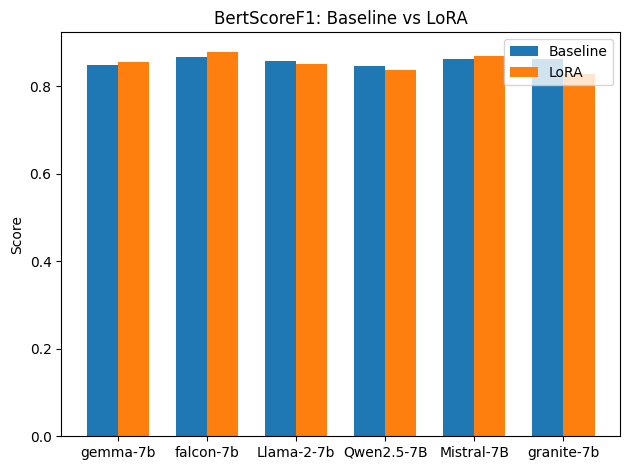

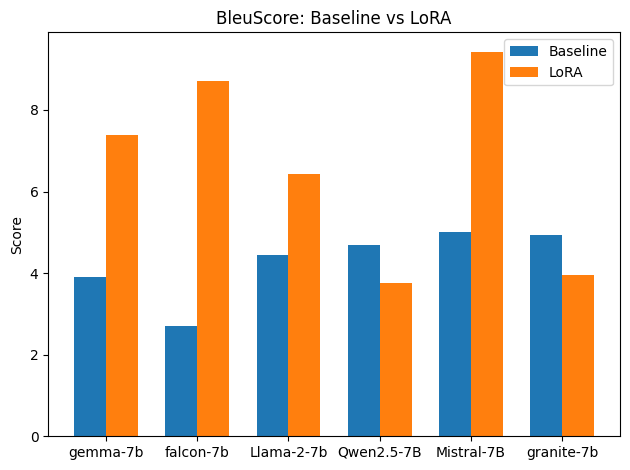

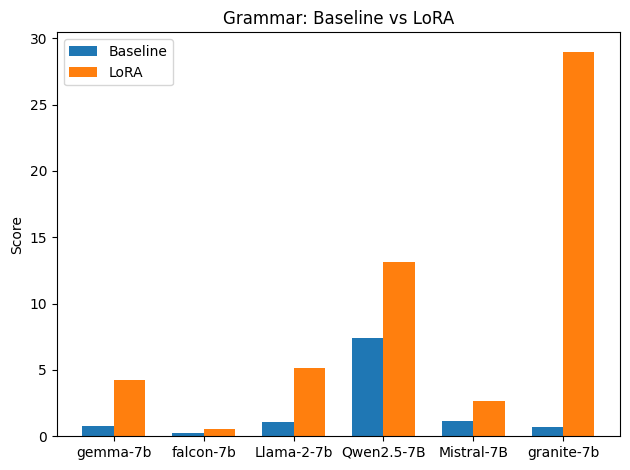

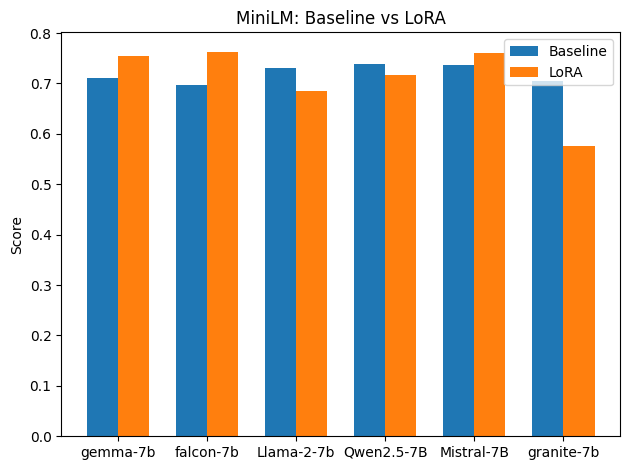

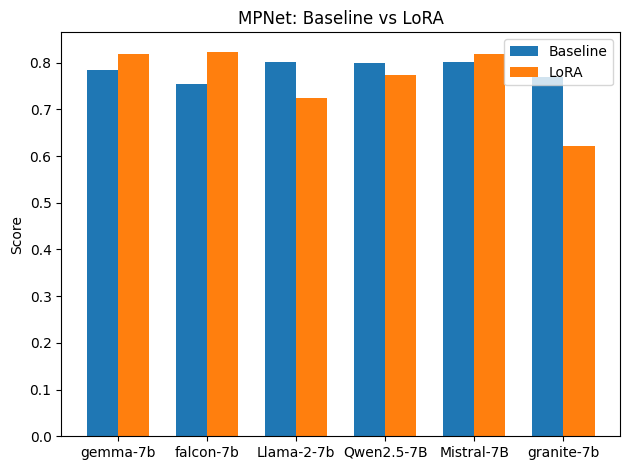

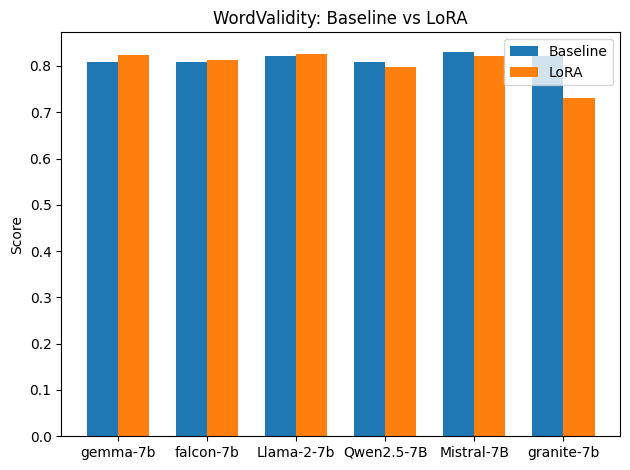

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Read CSVs
# df_baseline = pd.read_csv("Mean_BL.csv")
# df_lora = pd.read_csv("Mean_LR.csv")

df_baseline = bl3.copy()
df_lora = lr3.copy()

# Output folder
output_dir = "baseline_vs_lora_plots2"
os.makedirs(output_dir, exist_ok=True)

# Ensure same order
assert (df_baseline["Baseline"] == df_lora["LoRA"]).all()

metrics = df_baseline["Baseline"]
models = df_baseline.columns[1:]  # skip Metric column

# Loop through each row (metric)
for i, metric in enumerate(metrics):
    baseline_vals = df_baseline.loc[i, models].values.astype(float)
    lora_vals = df_lora.loc[i, models].values.astype(float)

    x = np.arange(len(models))
    width = 0.35

    plt.figure()
    plt.bar(x - width/2, baseline_vals, width, label="Baseline")
    plt.bar(x + width/2, lora_vals, width, label="LoRA")

    plt.xticks(x, models, rotation=0)
    plt.ylabel("Score")
    plt.title(f"{metric}: Baseline vs LoRA")
    plt.legend()

    plt.tight_layout()

    # Save figure
    filename = f"{metric}_baseline_vs_lora.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()
    plt.close()  # IMPORTANT: free memory


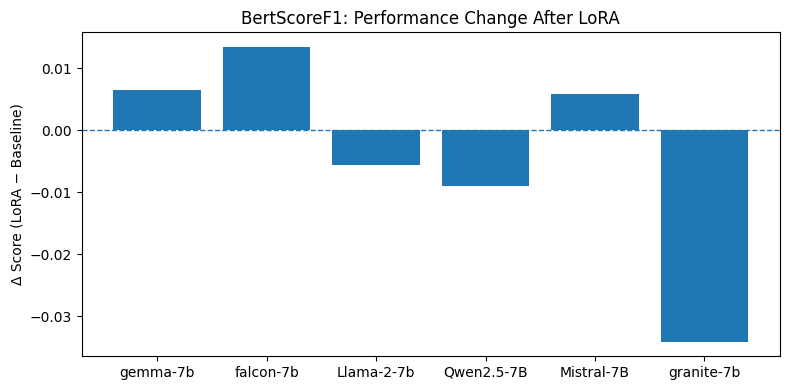

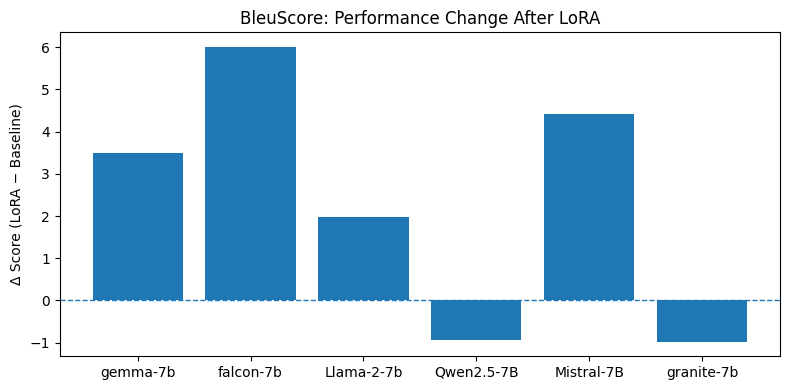

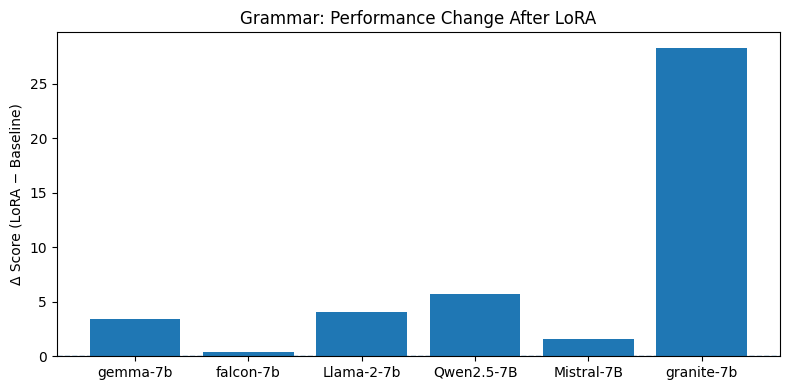

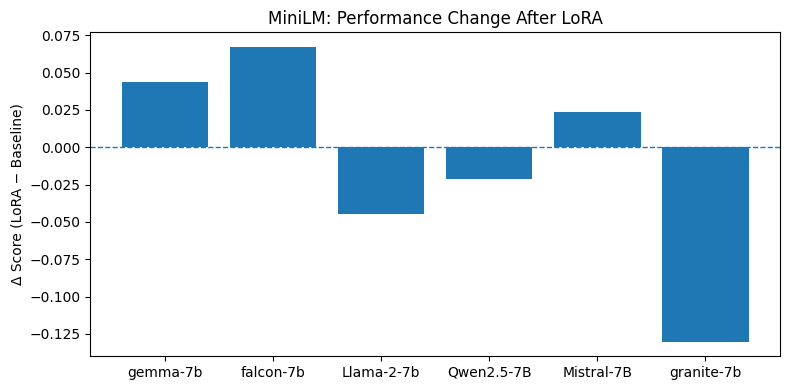

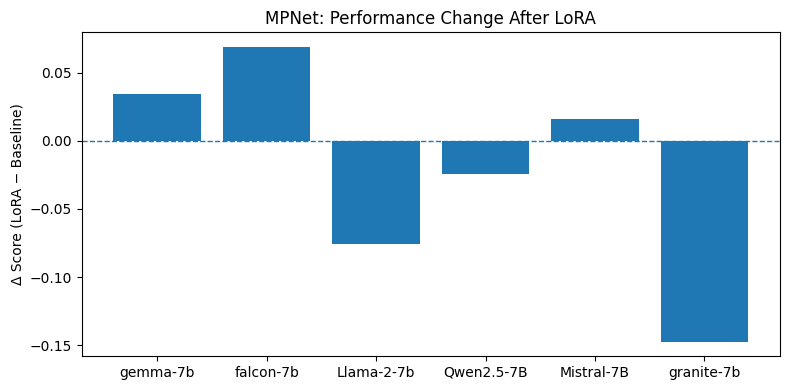

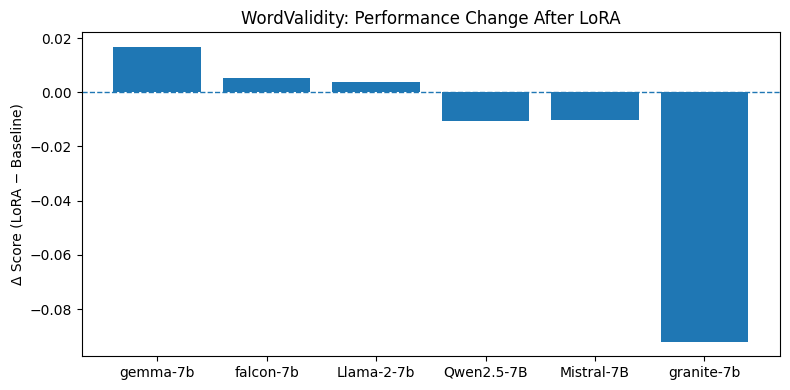

In [20]:
for i, metric in enumerate(metrics):
    baseline_vals = df_baseline.loc[i, models].values.astype(float)
    lora_vals = df_lora.loc[i, models].values.astype(float)

    diff = lora_vals - baseline_vals  # Δ = LoRA − Baseline

    x = np.arange(len(models))

    plt.figure(figsize=(8, 4))
    plt.bar(x, diff)
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.xticks(x, models, rotation=0)
    plt.ylabel("Δ Score (LoRA − Baseline)")
    plt.title(f"{metric}: Performance Change After LoRA")

    plt.tight_layout()
    plt.savefig(
        os.path.join(output_dir, f"{metric}_delta_lora_vs_baseline.png"),
        dpi=300
    )
    plt.show()
    plt.close()


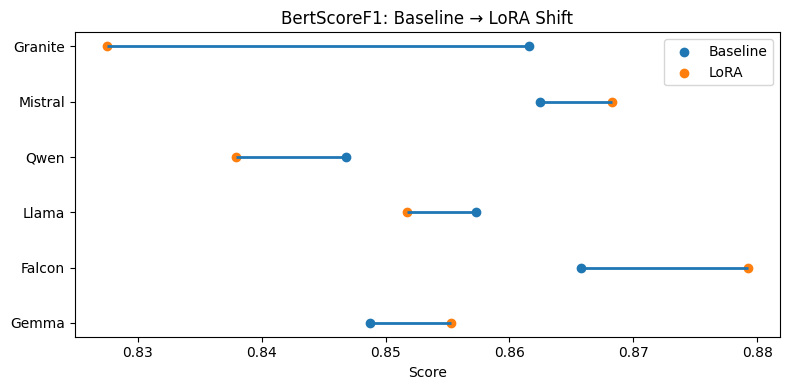

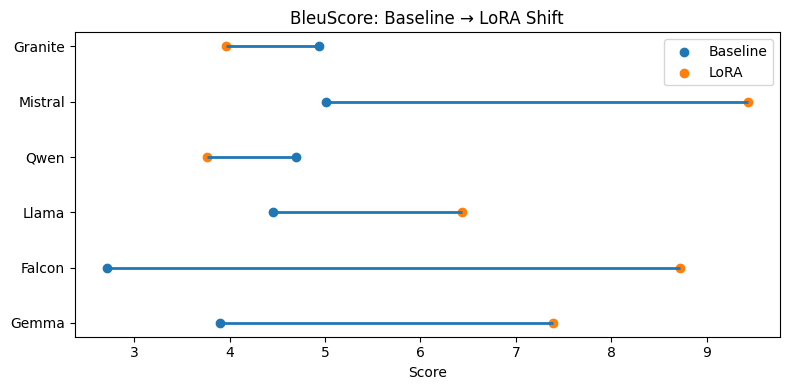

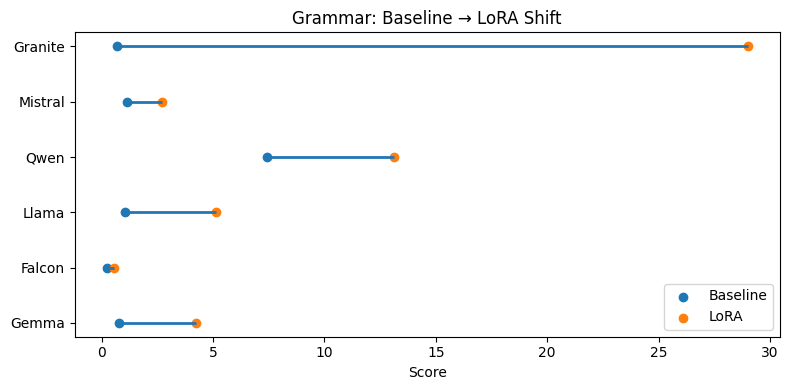

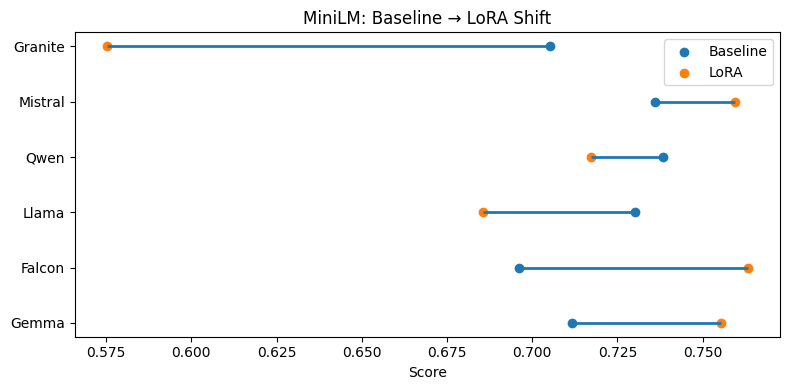

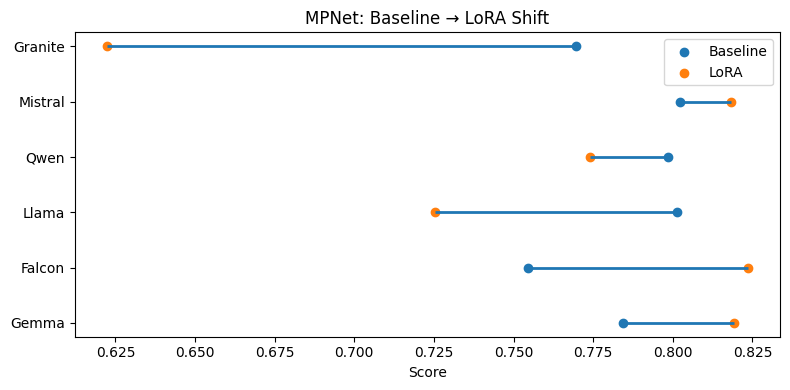

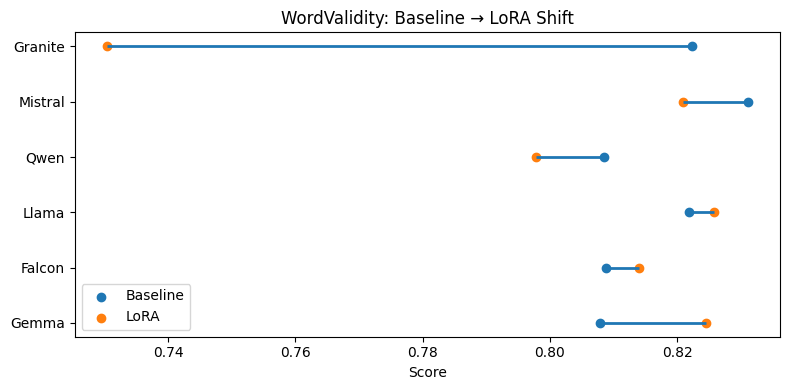

In [7]:
for i, metric in enumerate(metrics):
    baseline_vals = df_baseline.loc[i, models].values.astype(float)
    lora_vals = df_lora.loc[i, models].values.astype(float)

    y = np.arange(len(models))

    plt.figure(figsize=(8, 4))
    plt.hlines(y, baseline_vals, lora_vals, linewidth=2)
    plt.scatter(baseline_vals, y, label="Baseline")
    plt.scatter(lora_vals, y, label="LoRA")

    plt.yticks(y, models)
    plt.xlabel("Score")
    plt.title(f"{metric}: Baseline → LoRA Shift")
    plt.legend()

    plt.tight_layout()
    plt.savefig(
        os.path.join(output_dir, f"{metric}_dumbbell.png"),
        dpi=300
    )
    plt.show()
    plt.close()


### Heatmap

In [31]:
import pandas as pd

bl = pd.read_csv("Mean_BL.csv")
lr = pd.read_csv("Mean_LR.csv")

display(bl)
display(lr)

,Baseline,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.848716,0.865788,0.857297,0.846847,0.862440,0.861611
1,BleuScore,3.904092,2.711751,4.454666,4.692407,5.005882,4.938997
2,Grammar,0.800676,0.229730,1.043919,7.418919,1.152027,0.692568
3,MiniLM,0.711813,0.696220,0.730185,0.738310,0.735988,0.705222
4,MPNet,0.784517,0.754686,0.801201,0.798482,0.802288,0.769646
5,WordValidity,0.192139,0.191157,0.178081,0.191554,0.168854,0.177682


,LoRA,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,7.389509,8.717132,6.435348,3.758860,9.430999,3.965899
2,Grammar,4.260870,0.578595,5.137124,13.143813,2.695652,28.993311
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.175469,0.186011,0.174247,0.202119,0.179116,0.269651


In [36]:
import pandas as pd

bl = pd.read_csv("Mean_BL.csv")
lr = pd.read_csv("Mean_LR.csv")

# Grammar
min_g = bl.iloc[2, 2] 
max_g = lr.iloc[2, 6]

bl1 = bl.copy()
lr1 = lr.copy()
bl1.iloc[2, 1:] = (bl1.iloc[2, 1:] - min_g) / (max_g - min_g)
lr1.iloc[2, 1:] = (lr1.iloc[2, 1:] - min_g) / (max_g - min_g)

# BleuScore
min_b = bl.iloc[1, 2] 
max_b = lr.iloc[1, 5]

bl2 = bl1.copy()
lr2 = lr1.copy()
bl2.iloc[1, 1:] = (bl2.iloc[1, 1:] - min_b) / (max_b - min_b)
lr2.iloc[1, 1:] = (lr2.iloc[1, 1:] - min_b) / (max_b - min_b)

display(bl2)
display(lr2)

,Baseline,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.848716,0.865788,0.857297,0.846847,0.862440,0.861611
1,BleuScore,0.177452,0.000000,0.259391,0.294773,0.341427,0.331473
2,Grammar,0.019850,0.000000,0.028306,0.249941,0.032065,0.016091
3,MiniLM,0.711813,0.696220,0.730185,0.738310,0.735988,0.705222
4,MPNet,0.784517,0.754686,0.801201,0.798482,0.802288,0.769646
5,WordValidity,0.192139,0.191157,0.178081,0.191554,0.168854,0.177682


,LoRA,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,0.696173,0.893758,0.554169,0.155837,1.000000,0.186650
2,Grammar,0.140147,0.012129,0.170611,0.448973,0.085731,1.000000
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.175469,0.186011,0.174247,0.202119,0.179116,0.269651


### Invert

In [37]:
bl3 = bl2.copy()
lr3 = lr2.copy()
bl3.iloc[2, 1:] = 1 - bl3.iloc[2, 1:]
bl3.iloc[5, 1:] = 1 - bl3.iloc[5, 1:]
lr3.iloc[2, 1:] = 1 - lr3.iloc[2, 1:]
lr3.iloc[5, 1:] = 1 - lr3.iloc[5, 1:]

display(bl3)
display(lr3)

,Baseline,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.848716,0.865788,0.857297,0.846847,0.862440,0.861611
1,BleuScore,0.177452,0.000000,0.259391,0.294773,0.341427,0.331473
2,Grammar,0.980150,1.000000,0.971694,0.750059,0.967935,0.983909
3,MiniLM,0.711813,0.696220,0.730185,0.738310,0.735988,0.705222
4,MPNet,0.784517,0.754686,0.801201,0.798482,0.802288,0.769646
5,WordValidity,0.807861,0.808843,0.821919,0.808446,0.831146,0.822318


,LoRA,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,0.696173,0.893758,0.554169,0.155837,1.000000,0.186650
2,Grammar,0.859853,0.987871,0.829389,0.551027,0.914269,0.000000
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.824531,0.813989,0.825753,0.797881,0.820884,0.730349


### Difference

In [38]:
bl4 = bl3.set_index(bl3.columns[0])
lr4 = lr3.set_index(lr3.columns[0])
diff_df = lr4 - bl4
diff_df

,Gemma,Falcon,Llama,Qwen,Mistral,Granite
LoRA,,,,,,
BertScoreF1,0.006574,0.013463,-0.005578,-0.008912,0.005828,-0.034117
BleuScore,0.518721,0.893758,0.294777,-0.138936,0.658573,-0.144822
Grammar,-0.120298,-0.012129,-0.142305,-0.199033,-0.053666,-0.983909
MiniLM,0.043459,0.067100,-0.044724,-0.020992,0.023631,-0.130060
MPNet,0.034636,0.068913,-0.075980,-0.024514,0.015898,-0.147400
WordValidity,0.016669,0.005147,0.003834,-0.010566,-0.010262,-0.091969


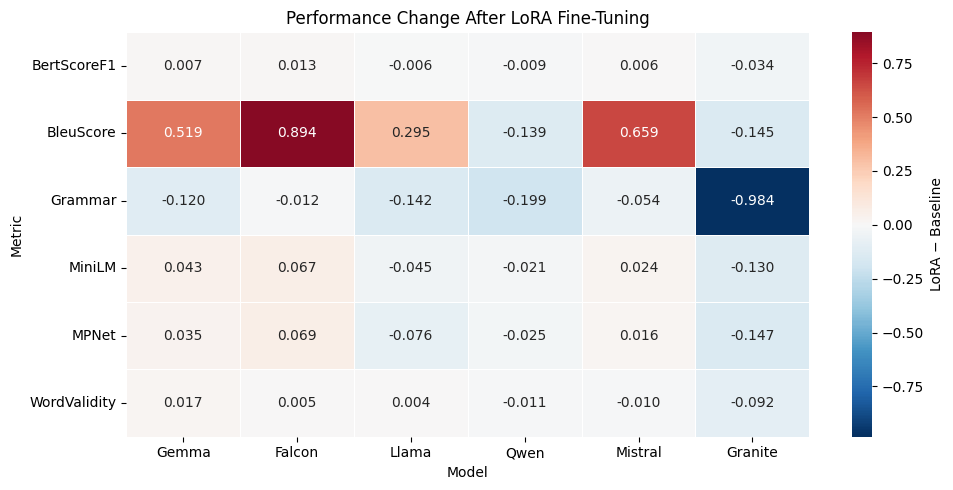

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.heatmap(
    diff_df,
    cmap="coolwarm",      # blue=positive, red=negative
    center=0,
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={"label": "LoRA − Baseline"}
)

plt.title("Performance Change After LoRA Fine-Tuning")
plt.xlabel("Model")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()
